In [ ]:
! pip  install ipykernel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import logsumexp
import ipykernel
from decimal import Decimal
from fractions import Fraction

# **Raizes de uma equação**



#classes e metodos utilizados

In [ ]:
class newton_raphson:
  
  def __init__(self,function,initial_dot,create_graph=False):
    
    self.initial_dot = initial_dot
    self.function = function
    self.create_graph = create_graph

  def find_root(self,deltaX,error,max_tries,inital_graph=0,end_graph=0):

    [self.dots,self.deltaX,count,old_dot]=[[],deltaX,0,self.initial_dot]

    while(True):

      print('iteration '+str(count)+'\n')
      self.dots.append(old_dot)
      print('f(x_n-1): '+str(self.function(old_dot))+' x_n-1:'+str(old_dot))
      new_dot = old_dot - self.function(old_dot)/self.derivate(old_dot)
      print('f(x_n): '+str(self.function(new_dot))+' x_n:'+str(new_dot))
      if (abs((new_dot-old_dot))/new_dot <= error) or count == max_tries:
        break

      old_dot = new_dot
      count+=1
    
    self.dots.append(new_dot)

    if self.create_graph:
      
      dots = np.array(self.dots)

      xs = np.linspace(dots[0]-inital_graph, dots[-1]+end_graph, 1000)
      y = [self.function(x) for x in xs]

      plt.plot(xs,y)
      plt.plot(self.dots,[self.function(dot) for dot in self.dots],'xb')
      plt.xlabel('X')
      plt.ylabel('f(X)')
      plt.title('Pontos utilizados pelo método de Newton')
      plt.grid()
      plt.show
 
    return new_dot

  def derivate(self,xn):

    return (self.function(xn+self.deltaX)-self.function(xn))/(self.deltaX)

class bisection_method:
  
  def __init__(self,function,initial_a,initial_b,create_graph=False):
    
    self.initial_a = initial_a
    self.initial_b = initial_b
    self.function = function
    self.create_graph = create_graph

  def find_root(self,error,max_tries,inital_graph=0,end_graph=0):

    [self.dots,count,a,b]=[[],0,self.initial_a,self.initial_b]

    old_middle_dot = (a+b)/2

    self.dots.append(old_middle_dot)

    while(True):
      print('iteration '+str(count)+'\n')
      print('f(x_n-1): '+str(self.function(logsumexp(old_middle_dot)))+' x_n-1:'+str(old_middle_dot))
      if self.function(logsumexp(a))*self.function(logsumexp(b))>0:
        a = old_middle_dot
      else:
        b = old_middle_dot

      new_middle_dot = (a+b)/2

      if count==max_tries or (abs(new_middle_dot-old_middle_dot)/new_middle_dot)<error:
        break
      old_middle_dot = new_middle_dot
      print('f(x_n): '+str(self.function(old_middle_dot))+' x_n:'+str(old_middle_dot))
      self.dots.append(old_middle_dot)
      #print(new_middle_dot-old_middle_dot,abs(new_middle_dot-old_middle_dot))
      
      
      count+=1

    if self.create_graph:
       
      dots = np.array(self.dots)

      xs = np.linspace(dots[0]-inital_graph, dots[-1]+end_graph, 1000)
      y = [self.function(x) for x in xs]

      plt.plot(xs,y)
      plt.plot(self.dots,[self.function(dot) for dot in self.dots],'xb')
      plt.xlabel('X')
      plt.ylabel('f(X)')
      plt.title('Pontos utilizados pelo método da bisseção')
      plt.grid()
      plt.show()
 
    return new_middle_dot



#Projeto 2:

real 2.34185971282333×10^-6

iteration 0

f(x_n-1): -1.2500001007963738e-07 x_n-1:0.0050000005
f(x_n): -1.562500035231803e-08 x_n:0.00250000075
iteration 1

f(x_n-1): -1.562500035231803e-08 x_n-1:0.00250000075
f(x_n): -1.9531222464692605e-09 x_n:0.001250000875
iteration 2

f(x_n-1): -1.9531222464692605e-09 x_n-1:0.001250000875
f(x_n): -2.4413829608338874e-10 x_n:0.0006250009375
iteration 3

f(x_n-1): -2.4413829608338874e-10 x_n-1:0.0006250009375
f(x_n): -3.051614816080418e-11 x_n:0.00031250096875
iteration 4

f(x_n-1): -3.051614816080418e-11 x_n-1:0.00031250096875
f(x_n): -3.813912471565046e-12 x_n:0.000156250984375
iteration 5

f(x_n-1): -3.813912471565046e-12 x_n-1:0.000156250984375
f(x_n): -4.764268767669453e-13 x_n:7.81259921875e-05
iteration 6

f(x_n-1): -4.764268767669453e-13 x_n-1:7.81259921875e-05
f(x_n): -5.939497704928315e-14 x_n:3.906349609375e-05
iteration 7

f(x_n-1): -5.939497704928315e-14 x_n-1:3.906349609375e-05
f(x_n): -7.344606014051819e-15 x_n:1.9532248046875e-05
iteration 8

f(x_n-1): -7.344606

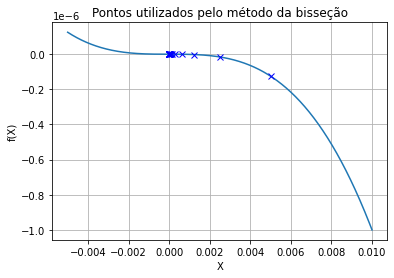

1.1835560340881348e-06

5.926811176079467

In [ ]:
[k1,k2,k3,kh,pco2]=[10**(-6.3),10**(-10.3),10**(-14),10**(-1.46),315]

#function = lambda x:x*5.474072610560535e-12 + 5.487070616723301e-22 + k3*x - x**3
function = lambda x:(x*k1*kh*pco2)/((10**6)) + (2*k2*k1*kh*pco2)/(10**6) + k3*x - x**3

bisection = bisection_method(function,10**(-12),10**(-2),True)
result = bisection.find_root(0.05,1000,0.01,0.01)
display(result)
display(-np.log10(result))

iteration 0

f(x_n-1): -1.2499996740373381e-07 x_n-1:0.0050000000005
f(x_n): -1.5624983697179078e-08 x_n:0.0025000000007500004
iteration 1

f(x_n-1): -1.5624983697179078e-08 x_n-1:0.0025000000007500004
f(x_n): -1.9531168456595197e-09 x_n:0.0012500000008750002
iteration 2

f(x_n-1): -1.9531168456595197e-09 x_n-1:0.0012500000008750002
f(x_n): -2.441365468772812e-10 x_n:0.0006250000009375001
iteration 3

f(x_n-1): -2.441365468772812e-10 x_n-1:0.0006250000009375001
f(x_n): -3.0515538797807756e-11 x_n:0.00031250000096875004
iteration 4

f(x_n-1): -3.0515538797807756e-11 x_n-1:0.00031250000096875004
f(x_n): -3.8136775318900374e-12 x_n:0.00015625000098437502
iteration 5

f(x_n-1): -3.8136775318900374e-12 x_n-1:0.00015625000098437502
f(x_n): -4.76327273124375e-13 x_n:7.812500099218751e-05
iteration 6

f(x_n-1): -4.76327273124375e-13 x_n-1:7.812500099218751e-05
f(x_n): -5.934969738214828e-14 x_n:3.906250099609375e-05
iteration 7

f(x_n-1): -5.934969738214828e-14 x_n-1:3.906250099609375e-05
f(x_

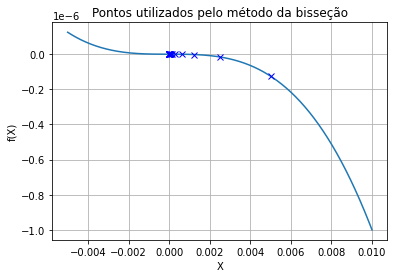

2.3651133044509887e-06

5.626148048871565

In [ ]:
[k1,k2,k3,kh,pco2]=[10**(-6.3),10**(-10.3),10**(-14),10**(-1.46),375]

#function = lambda x:x*5.474072610560535e-12 + 5.487070616723301e-22 + k3*x - x**3
function = lambda x:(x*k1*kh*pco2)/((10**6)) + (2*k2*k1*kh*pco2)/(10**6) + k3*x - x**3

bisection = bisection_method(function,10**(-12),10**(-2),True)
result = bisection.find_root(0.05,1000,0.01,0.01)
display(result)
display(-np.log10(result))


In [ ]:
5.626148048871565/5.927177860910352

0.9492119489067345

#Projeto 4:

raiz real = 0.03996479

iteration 0

f(x_n-1): -2.8326255467240258 x_n-1:0.21000000000000002
f(x_n): -2.0625313075394254 x_n:0.115
iteration 1

f(x_n-1): -2.0625313075394254 x_n-1:0.115
f(x_n): -1.158344145822456 x_n:0.0675
iteration 2

f(x_n-1): -1.158344145822456 x_n-1:0.0675
f(x_n): -0.22227357779960588 x_n:0.043750000000000004
iteration 3

f(x_n-1): -0.22227357779960588 x_n-1:0.043750000000000004
f(x_n): 0.6015847046244893 x_n:0.031875
iteration 4

f(x_n-1): 0.6015847046244893 x_n-1:0.031875
f(x_n): 1.2123720776271414 x_n:0.025937500000000002
iteration 5

f(x_n-1): 1.2123720776271414 x_n-1:0.025937500000000002
f(x_n): 0.8834293147676116 x_n:0.02890625
iteration 6

f(x_n-1): 0.8834293147676116 x_n-1:0.02890625
f(x_n): 0.7373435017912948 x_n:0.030390625
iteration 7

f(x_n-1): 0.7373435017912948 x_n-1:0.030390625
f(x_n): 0.6682504009409813 x_n:0.031132812500000002
iteration 8

f(x_n-1): 0.6682504009409813 x_n-1:0.031132812500000002
f(x_n): 0.6346230759296141 x_n:0.031503906250000005
iteration 9

f(x_n-1): 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


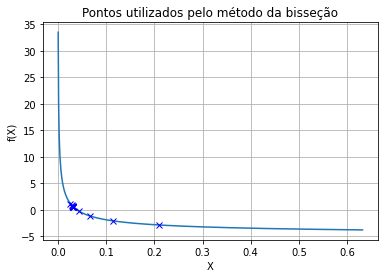

0.031872100830078125

In [ ]:
re = (1.23*40*0.005)/0.0000179
function = lambda x: logsumexp(1)/logsumexp((x)**(1/2)) + logsumexp(2*np.log(0.0015/(3.7*0.005) +logsumexp(2.51)/logsumexp(((x**(1/2))*re)) ) )

bisection = bisection_method(function,0.02,0.4,True)
display(bisection.find_root(0.0001,100,0.5,0.6))

Trying to solve project 4 problem by Newton-raphson.

iteration 0

f(x_n-1): 2.078061226720264 x_n-1:0.02
f(x_n): -0.0008763035287593368 x_n:0.03997873574989634
iteration 1

f(x_n-1): -0.0008763035287593368 x_n-1:0.03997873574989634
f(x_n): 0.0003181327643719811 x_n:0.03995973147654048


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


0.03995973147654048

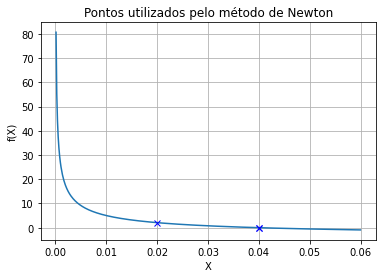

In [ ]:
re = (1.23*40*0.005)/0.0000179

function = lambda x: 1/(x)**(1/2) + 2*np.log(0.0015/(3.7*0.005)+2.51/((x**(1/2))*re) )
#function = lambda x: logsumexp(1)/logsumexp((x)**(1/2)) + logsumexp(2*np.log(0.0015/(3.7*0.005) +logsumexp(2.51)/logsumexp(((x**(1/2))*re)) ) )
newton_raphson_method = newton_raphson(function,0.02,True)

display(newton_raphson_method.find_root(0.02,0.001,100,0.1,0.02))